In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset.
Df = pd.read_csv('Main_df.csv')

In [3]:
Df.head()

,Address,Beds,Bathrooms,Price,Bhktype,Property_type,Balcony,City,State_code,Country,...,Construction stats,Year_built,Price_per_Area,Transaction type,Furnished status,Facing,Car park,Ownership type,Booking amount,Floor
0,"16713 LOWELL DR, NOBLESVILLE, IN 46060",2,2,255000.00,2.0,Budget home,1.0,Noblesville,317.0,Hamilton,...,Ready for Move,1980,4000,Sale,Semi-furnished,East,1.0,Freehold,100000.0,5.0
1,"6476 STOKES AVE, NOBLESVILLE, IN 46062",2,2,420000.00,2.0,Budget home,1.0,Noblesville,317.0,Hamilton,...,Ready for Move,1980,4000,Sale,Semi-furnished,East,1.0,Freehold,100000.0,5.0
2,"841 DORCHESTER DR, NOBLESVILLE, IN 46062",2,2,350000.00,2.0,Budget home,1.0,Noblesville,317.0,Hamilton,...,Ready for Move,1980,4000,Sale,Semi-furnished,East,1.0,Freehold,100000.0,5.0
3,"15935 EASTPARK CT, NOBLESVILLE, IN 46060",2,2,494900.00,2.0,Budget home,1.0,Noblesville,317.0,Hamilton,...,Ready for Move,1980,4000,Sale,Semi-furnished,East,1.0,Freehold,100000.0,5.0
4,"12595 OLD POND RD, NOBLESVILLE, IN 46060",2,2,329000.00,2.0,Budget home,1.0,Noblesville,317.0,Hamilton,...,Ready for Move,1980,4000,Sale,Semi-furnished,East,1.0,Freehold,100000.0,5.0


In [4]:
Df.tail(5)

,Address,Beds,Bathrooms,Price,Bhktype,Property_type,Balcony,City,State_code,Country,...,Construction stats,Year_built,Price_per_Area,Transaction type,Furnished status,Facing,Car park,Ownership type,Booking amount,Floor
3027,"Dumas, Surat",3,2,60000000.00,3.0,Apartment,1.0,Surat,24.0,India,...,Under Construction,Nan,4000,Sale,Semi-furnished,Nan,2.0,Freehold,95000.0,10.0
3028,"Dindoli, Surat",3,2,3151000.00,3.0,Apartment,1.0,Surat,24.0,India,...,Ready to move,Nan,4000,Sale,Semi-furnished,Nan,2.0,Freehold,95000.0,10.0
3029,"Adajan Gam, Surat",3,2,35000000.00,3.0,Apartment,1.0,Surat,24.0,India,...,Ready to move,Nan,4000,Sale,Semi-furnished,Nan,2.0,Freehold,95000.0,10.0
3030,"Dumas, Surat",3,2,6300000.00,3.0,Apartment,1.0,Surat,24.0,India,...,Under Construction,Nan,4000,Sale,Semi-furnished,Nan,2.0,Freehold,95000.0,10.0
3031,"Vesu, Surat",3,2,14000000.00,3.0,Apartment,1.0,Surat,24.0,India,...,Ready to move,Nan,4000,Sale,Semi-furnished,Nan,2.0,Freehold,95000.0,10.0


# Exploratory Data Analysis

In [5]:
# Checking the dimensions of the dataset.
Df.shape

(3032, 22)

In [6]:
Df.columns

Index(['Address', 'Beds', 'Bathrooms', 'Price', 'Bhktype', 'Property_type',
       'Balcony', 'City', 'State_code', 'Country', 'Landmark', 'Carpet_area',
       'Construction stats', 'Year_built', 'Price_per_Area',
       'Transaction type', 'Furnished status', 'Facing', 'Car park',
       'Ownership type', 'Booking amount', 'Floor'],
      dtype='object')

In [50]:
Df.isnull().sum()

Address               0
Beds                  0
Bathrooms             0
Price                 0
Bhktype               0
Property_type         0
Balcony               0
Carpet_area           0
Construction stats    0
Price_per_Area        0
Transaction type      0
Furnished status      0
Car park              0
Ownership type        0
Booking amount        0
Floor                 0
dtype: int64

In [35]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3032 entries, 0 to 3031
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             3030 non-null   object 
 1   Beds                3032 non-null   object 
 2   Bathrooms           3032 non-null   object 
 3   Price               3030 non-null   object 
 4   Bhktype             3032 non-null   float64
 5   Property_type       3032 non-null   object 
 6   Balcony             3032 non-null   float64
 7   Carpet_area         3032 non-null   float64
 8   Construction stats  3032 non-null   object 
 9   Price_per_Area      3032 non-null   int64  
 10  Transaction type    3032 non-null   object 
 11  Furnished status    3032 non-null   object 
 12  Facing              819 non-null    object 
 13  Car park            3032 non-null   float64
 14  Ownership type      3032 non-null   object 
 15  Booking amount      3032 non-null   float64
 16  Floor 

We can clearly see that null values are present. Since less values are missing, lets use mean and median or mode to replace Nan values.

In [74]:
# Checking value count for each column
for i in Df.columns:
    print(Df[i].value_counts())
    print("\n")

Address
Rohta, Agra                 69
Kakkanad, Kochi             54
Marani mainroad, Madurai    27
Vesu, Surat                 25
Uthangudi, Madurai          23
                            ..
Bata Nagar, Kolkata          1
Kasba, Kolkata               1
Howrah, Kolkata              1
New Alipore, Kolkata         1
Rajpur Sonarpur, Kolkata     1
Name: count, Length: 1122, dtype: int64


Beds
2    1658
3     663
1     463
4     243
Name: count, dtype: int64


Bathrooms
2    1652
1    1186
3     188
4       1
Name: count, dtype: int64


Price
4500000.0    68
6500000.0    54
2500000.0    47
7000000.0    47
7500000.0    43
             ..
3499000.0     1
6550000.0     1
9199000.0     1
5252000.0     1
3151000.0     1
Name: count, Length: 1086, dtype: int64


Bhktype
2.0    1068
3.0     926
1.0     574
4.0     439
5.0      20
Name: count, dtype: int64


Property_type
Apartment      1917
Budget home    1110
Name: count, dtype: int64


Balcony
1.0    1701
0.0     842
2.0     484
Name: count,

In [27]:
Df.replace('Nan', np.nan, inplace=True)

Df['Beds'].fillna(Df['Beds'].mode()[0],inplace=True)
Df['Bathrooms'].fillna(Df['Bathrooms'].mode()[0],inplace=True)  # lets fill up with mode.

In [13]:
Df['Floor'].fillna(Df['Floor'].mode()[0],inplace=True)
Df['Booking amount'].fillna(Df['Booking amount'].mode()[0],inplace=True)
Df['Ownership type'].fillna(Df['Ownership type'].mode()[0],inplace=True)
Df['Car park'].fillna(Df['Car park'].mode()[0],inplace=True)
Df['Transaction type'].fillna(Df['Transaction type'].mode()[0],inplace=True)

In [15]:
Df['Bhktype'].fillna(Df['Bhktype'].mode()[0],inplace=True)
Df['Carpet_area'].fillna(Df['Carpet_area'].mode()[0],inplace=True)
Df['Furnished status'].fillna(Df['Furnished status'].mode()[0],inplace=True)

In [30]:
# Remove '/ sq ft' from Price_per_Area
Df['Price_per_Area'] = Df['Price_per_Area'].str.replace(' / sq ft', '')

# Convert Price_per_Area to numeric (if needed)
Df['Price_per_Area'] = pd.to_numeric(Df['Price_per_Area'].str.replace(',', ''))

In [19]:
Df['Balcony'].fillna(Df['Balcony'].mode()[0],inplace=True)
Df['Property_type'].fillna(Df['Property_type'].mode()[0],inplace=True)
Df.drop(['Year_built'], axis=1, inplace=True)

In [34]:
# Consolidate similar values
Df['Property_type'] = Df['Property_type'].replace('Budget Home', 'Budget home')

In [21]:
Df.drop(['State_code'], axis=1, inplace=True)  # Dropping unnecessary columns.
Df.drop(['Landmark'], axis=1, inplace=True)
Df.drop(['Country', 'City'], axis=1, inplace=True)

In [38]:
Df.drop(['Facing'], axis=1, inplace=True)   # Since significant amount of data is missing.

In [49]:
Df.dropna(subset=['Address', 'Price'], inplace=True)

<Axes: >

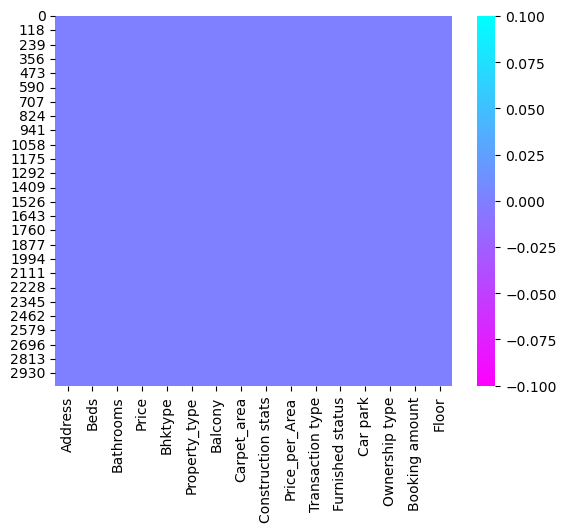

In [54]:
# Now visualize using heatmap.
sns.heatmap(Df.isnull(), cmap = "cool_r")

In [75]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, 0 to 3031
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Address             3027 non-null   object 
 1   Beds                3027 non-null   int64  
 2   Bathrooms           3027 non-null   int64  
 3   Price               3027 non-null   float64
 4   Bhktype             3027 non-null   float64
 5   Property_type       3027 non-null   object 
 6   Balcony             3027 non-null   float64
 7   Carpet_area         3027 non-null   float64
 8   Construction stats  3027 non-null   object 
 9   Price_per_Area      3027 non-null   int64  
 10  Transaction type    3027 non-null   object 
 11  Furnished status    3027 non-null   object 
 12  Car park            3027 non-null   float64
 13  Ownership type      3027 non-null   object 
 14  Booking amount      3027 non-null   float64
 15  Floor               3027 non-null   float64
dtypes: float64(

In [52]:
# Convert Beds and Bathrooms to numeric (assuming they are integers)
Df['Beds'] = pd.to_numeric(Df['Beds'], errors='coerce')
Df['Bathrooms'] = pd.to_numeric(Df['Bathrooms'], errors='coerce')

# Convert Price to numeric (assuming it represents currency)
Df['Price'] = pd.to_numeric(Df['Price'], errors='coerce')

# Convert Bhktype, Balcony, Carpet_area, Car park, Booking amount, and Floor to float64
cols_to_convert = ['Bhktype', 'Balcony', 'Carpet_area', 'Car park', 'Booking amount', 'Floor']
Df[cols_to_convert] = Df[cols_to_convert].astype('float64')

# Convert Price_per_Area to int64
Df['Price_per_Area'] = Df['Price_per_Area'].astype('int64')

In [73]:
Df['Furnished status'] = Df['Furnished status'].replace({
    'UNfurnished': 'Unfurnished',
    'Semifurnished': 'Semi-furnished',
    'Fullyfurnished': 'Fully-furnished'
})

In [76]:
# Separating numerical and categorical columns.
# Checking for categorical columns
categorical_columns = []
for i in Df.dtypes.index:
    if Df.dtypes[i] == "object":
        categorical_columns.append(i)
print("Categorical Columns: ", categorical_columns)
print("\n")

Categorical Columns:  ['Address', 'Property_type', 'Construction stats', 'Transaction type', 'Furnished status', 'Ownership type']




In [57]:
numerical_columns = []
for i in Df.dtypes.index:
    if Df.dtypes[i] != "object":
        numerical_columns.append(i)
print("Numerical Columns: ", numerical_columns)
print("\n")

Numerical Columns:  ['Beds', 'Bathrooms', 'Price', 'Bhktype', 'Balcony', 'Carpet_area', 'Price_per_Area', 'Car park', 'Booking amount', 'Floor']




# Description of Dataset

In [58]:
Df.describe()

,Beds,Bathrooms,Price,Bhktype,Balcony,Carpet_area,Price_per_Area,Car park,Booking amount,Floor
count,3027.000000,3027.000000,3.027000e+03,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000
mean,2.226627,1.670961,9.265005e+06,2.426165,0.881731,1615.791212,3872.333003,0.990420,139986.785596,7.707962
std,0.801216,0.589139,2.655208e+07,0.976635,0.651314,350.556719,419.547317,0.836763,187978.250587,4.706938
min,1.000000,1.000000,1.000000e+00,1.000000,0.000000,1000.000000,1724.000000,0.000000,30000.000000,2.000000
25%,2.000000,1.000000,2.200000e+06,2.000000,0.000000,1500.000000,3500.000000,0.000000,80000.000000,3.000000
50%,2.000000,2.000000,5.200000e+06,2.000000,1.000000,1800.000000,3800.000000,1.000000,95000.000000,8.000000
75%,3.000000,2.000000,9.000000e+06,3.000000,1.000000,1800.000000,4000.000000,2.000000,100000.000000,12.000000
max,4.000000,4.000000,8.546000e+08,5.000000,2.000000,2500.000000,9102.000000,2.000000,900000.000000,15.000000


1. No data is missing in our dataset.
2. Our data is skewed as median is less than mean.
3. Between 75% and max huge differences can be seen, outliers might be present.
4. Maximum beds turned out to be 4 and baths to be 4 too.
5. Maximum floors are 15 while minimum are 2.

# Data Visualization 

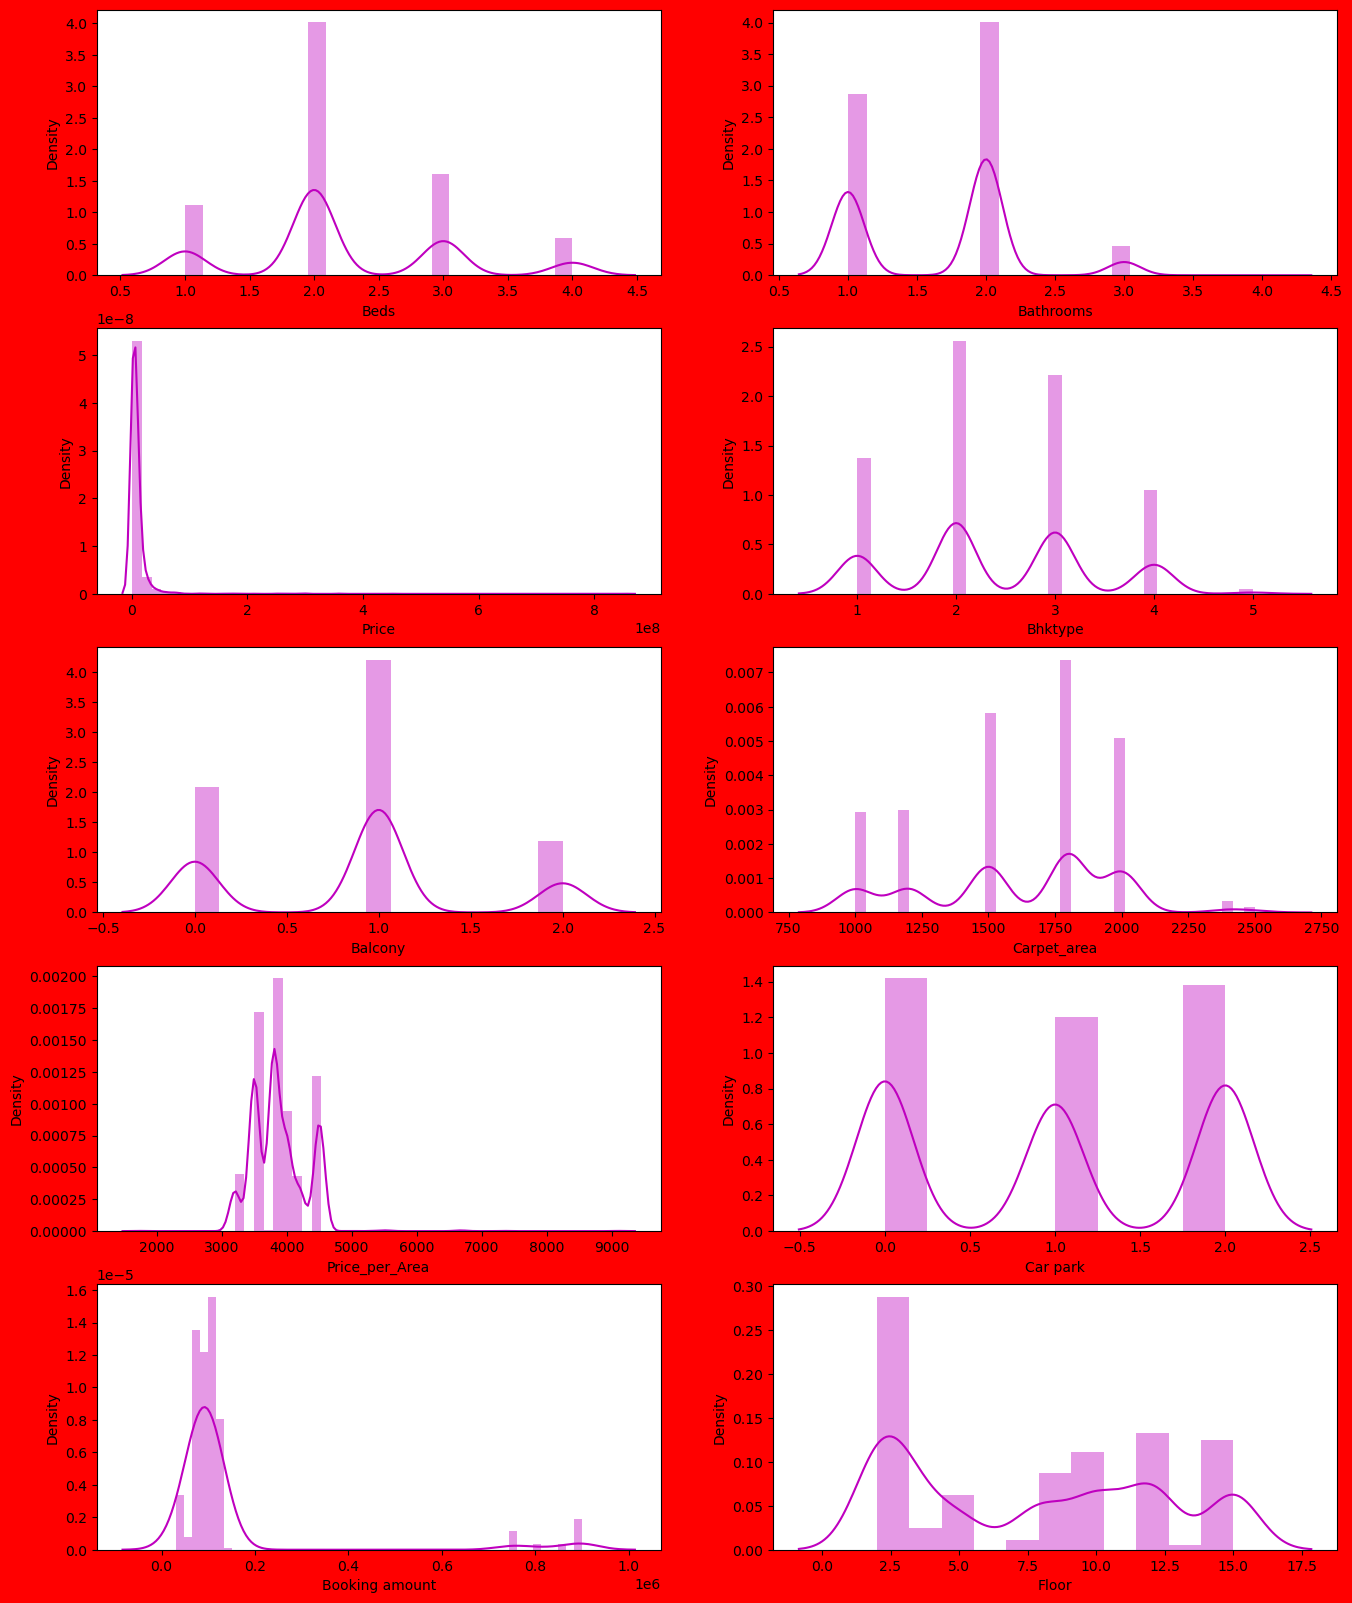

In [60]:
# Let's check how data has been distributed in remaining columns.
plt.figure(figsize = (16, 20), facecolor = 'red')
plotnumber = 1
for column in numerical_columns:
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.distplot(Df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

<Axes: >

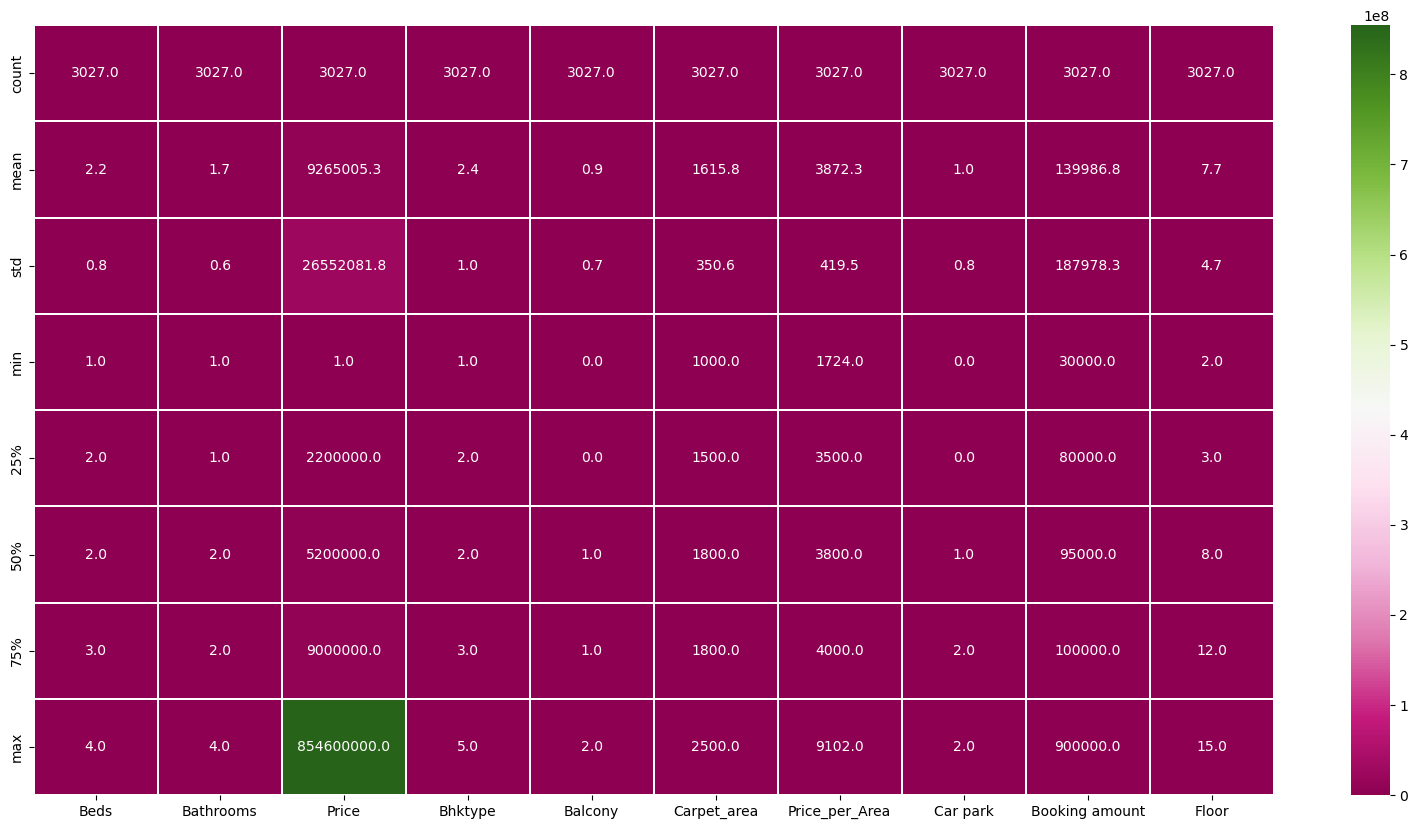

In [61]:
plt.figure(figsize=(20,10))    # Generating heatmap.
sns.heatmap(Df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

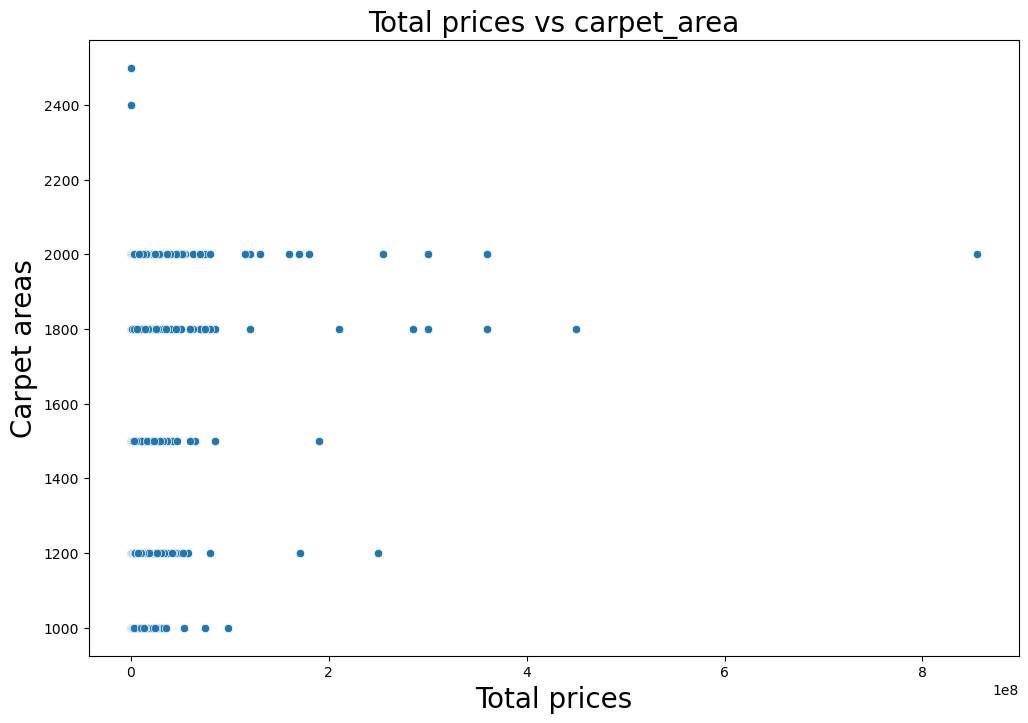

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Price', y='Carpet_area', data=Df, palette= 'hsv')
plt.xlabel('Total prices', fontsize=20)
plt.ylabel('Carpet areas', fontsize=20)
plt.title('Total prices vs carpet_area', fontsize=20)
plt.show()

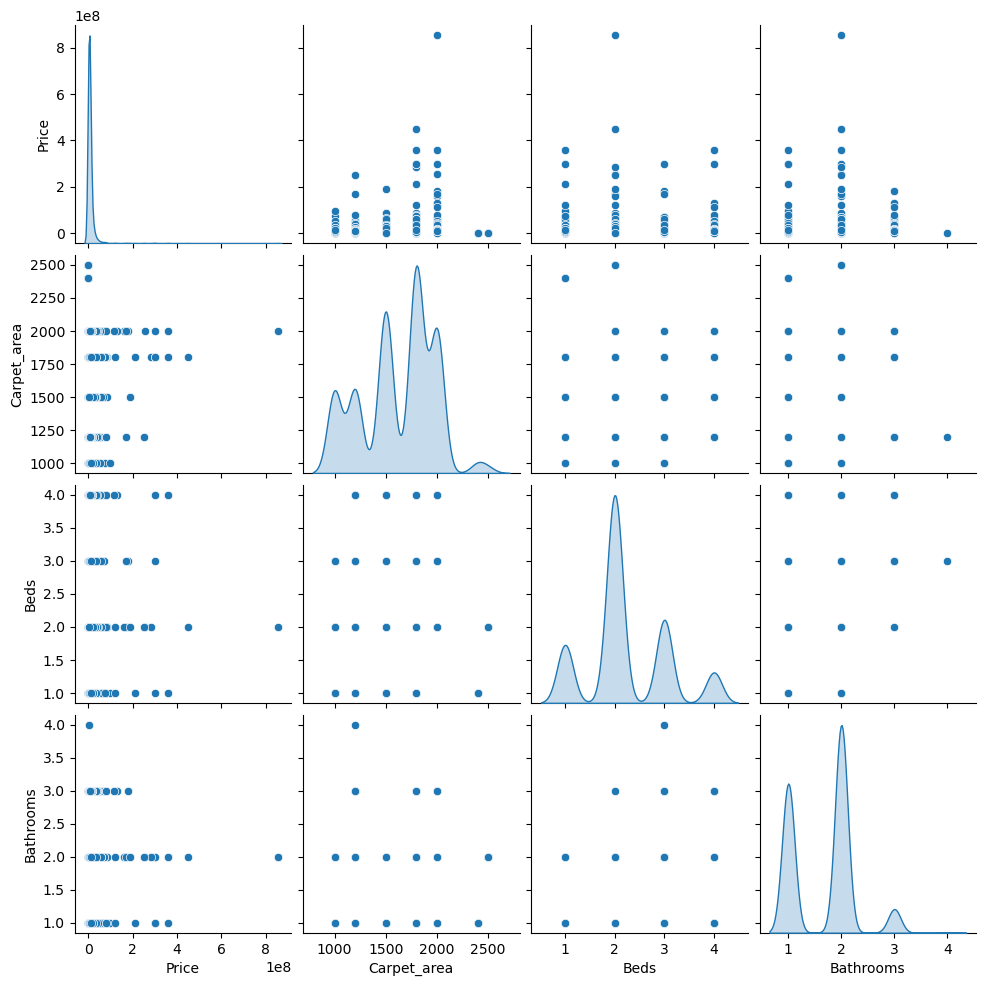

In [66]:
sns.pairplot(Df[['Price', 'Carpet_area', 'Beds', 'Bathrooms']], diag_kind='kde')
plt.show()

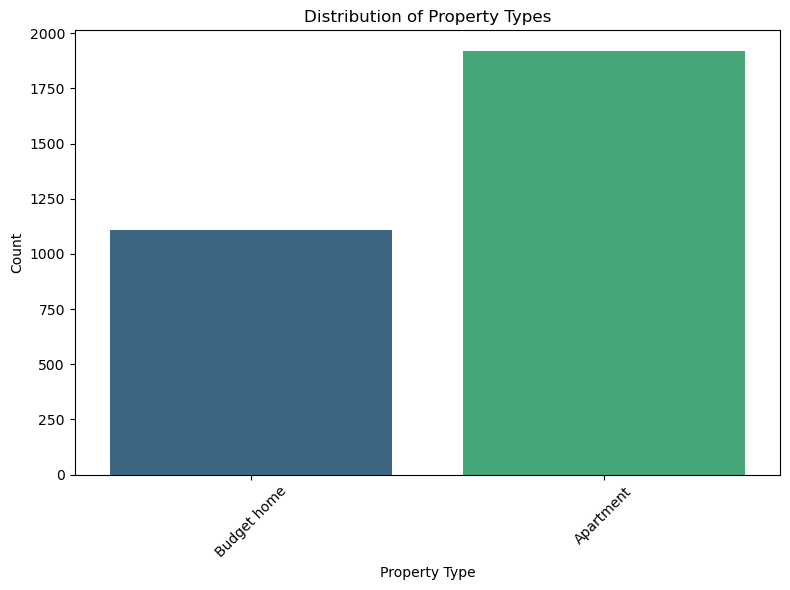

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_type', data=Df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')
plt.tight_layout()
plt.show()

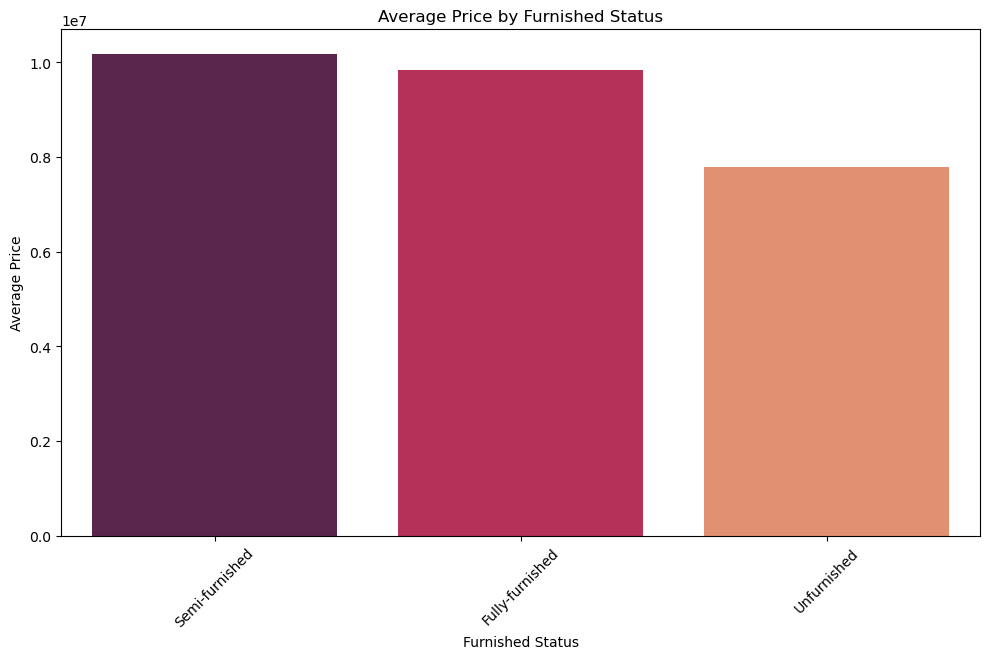

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Furnished status', y='Price', data=Df, ci=None, palette='rocket')
plt.xlabel('Furnished Status')
plt.ylabel('Average Price')
plt.title('Average Price by Furnished Status')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


Most of the properties are Semi-furnished.

In [83]:
pd.crosstab(Df['Furnished status'],Df['Car park'], margins=True).style.background_gradient(cmap='summer_r')

Car park,0.000000,1.000000,2.000000,All
Furnished status,,,,
Fully-furnished,178,175,219,572
Semi-furnished,600,493,286,1379
Unfurnished,296,240,540,1076
All,1074,908,1045,3027


In [84]:
pd.crosstab(Df['Carpet_area'],Df['Price'], margins=True).style.background_gradient(cmap='summer_r')

Price,1.000000,1.020000,1.030000,1.040000,1.050000,1.060000,1.070000,1.080000,1.090000,1.100000,1.130000,1.170000,1.230000,1.240000,1.250000,1.260000,1.280000,1.300000,1.350000,1.400000,1.440000,1.450000,1.490000,1.500000,1.520000,1.540000,1.550000,1.560000,1.590000,1.600000,1.610000,1.640000,1.650000,1.700000,1.710000,1.740000,1.770000,1.800000,1.820000,1.850000,1.900000,1.920000,1.940000,1.950000,1.970000,1.990000,2.000000


In [85]:
pd.crosstab(Df['Furnished status'],Df['Price'], margins=True).style.background_gradient(cmap='summer_r')

## Encoding Categorical Columns

In [86]:
Df = Df.drop('Address', axis=1)

In [89]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
def ordinal_encode(Df, column):
    Df[column] = OE.fit_transform(Df[column])
    return Df

oe_col = ['Property_type', 'Construction stats', 'Transaction type', 'Furnished status', 'Ownership type']
Df=ordinal_encode(Df, oe_col)
Df.head()

,Beds,Bathrooms,Price,Bhktype,Property_type,Balcony,Carpet_area,Construction stats,Price_per_Area,Transaction type,Furnished status,Car park,Ownership type,Booking amount,Floor
0,2,2,255000.0,2.0,1.0,1.0,1500.0,1.0,4000,2.0,1.0,1.0,0.0,100000.0,5.0
1,2,2,420000.0,2.0,1.0,1.0,1500.0,1.0,4000,2.0,1.0,1.0,0.0,100000.0,5.0
2,2,2,350000.0,2.0,1.0,1.0,1500.0,1.0,4000,2.0,1.0,1.0,0.0,100000.0,5.0
3,2,2,494900.0,2.0,1.0,1.0,1500.0,1.0,4000,2.0,1.0,1.0,0.0,100000.0,5.0
4,2,2,329000.0,2.0,1.0,1.0,1500.0,1.0,4000,2.0,1.0,1.0,0.0,100000.0,5.0


## Outlier Detection and Removal

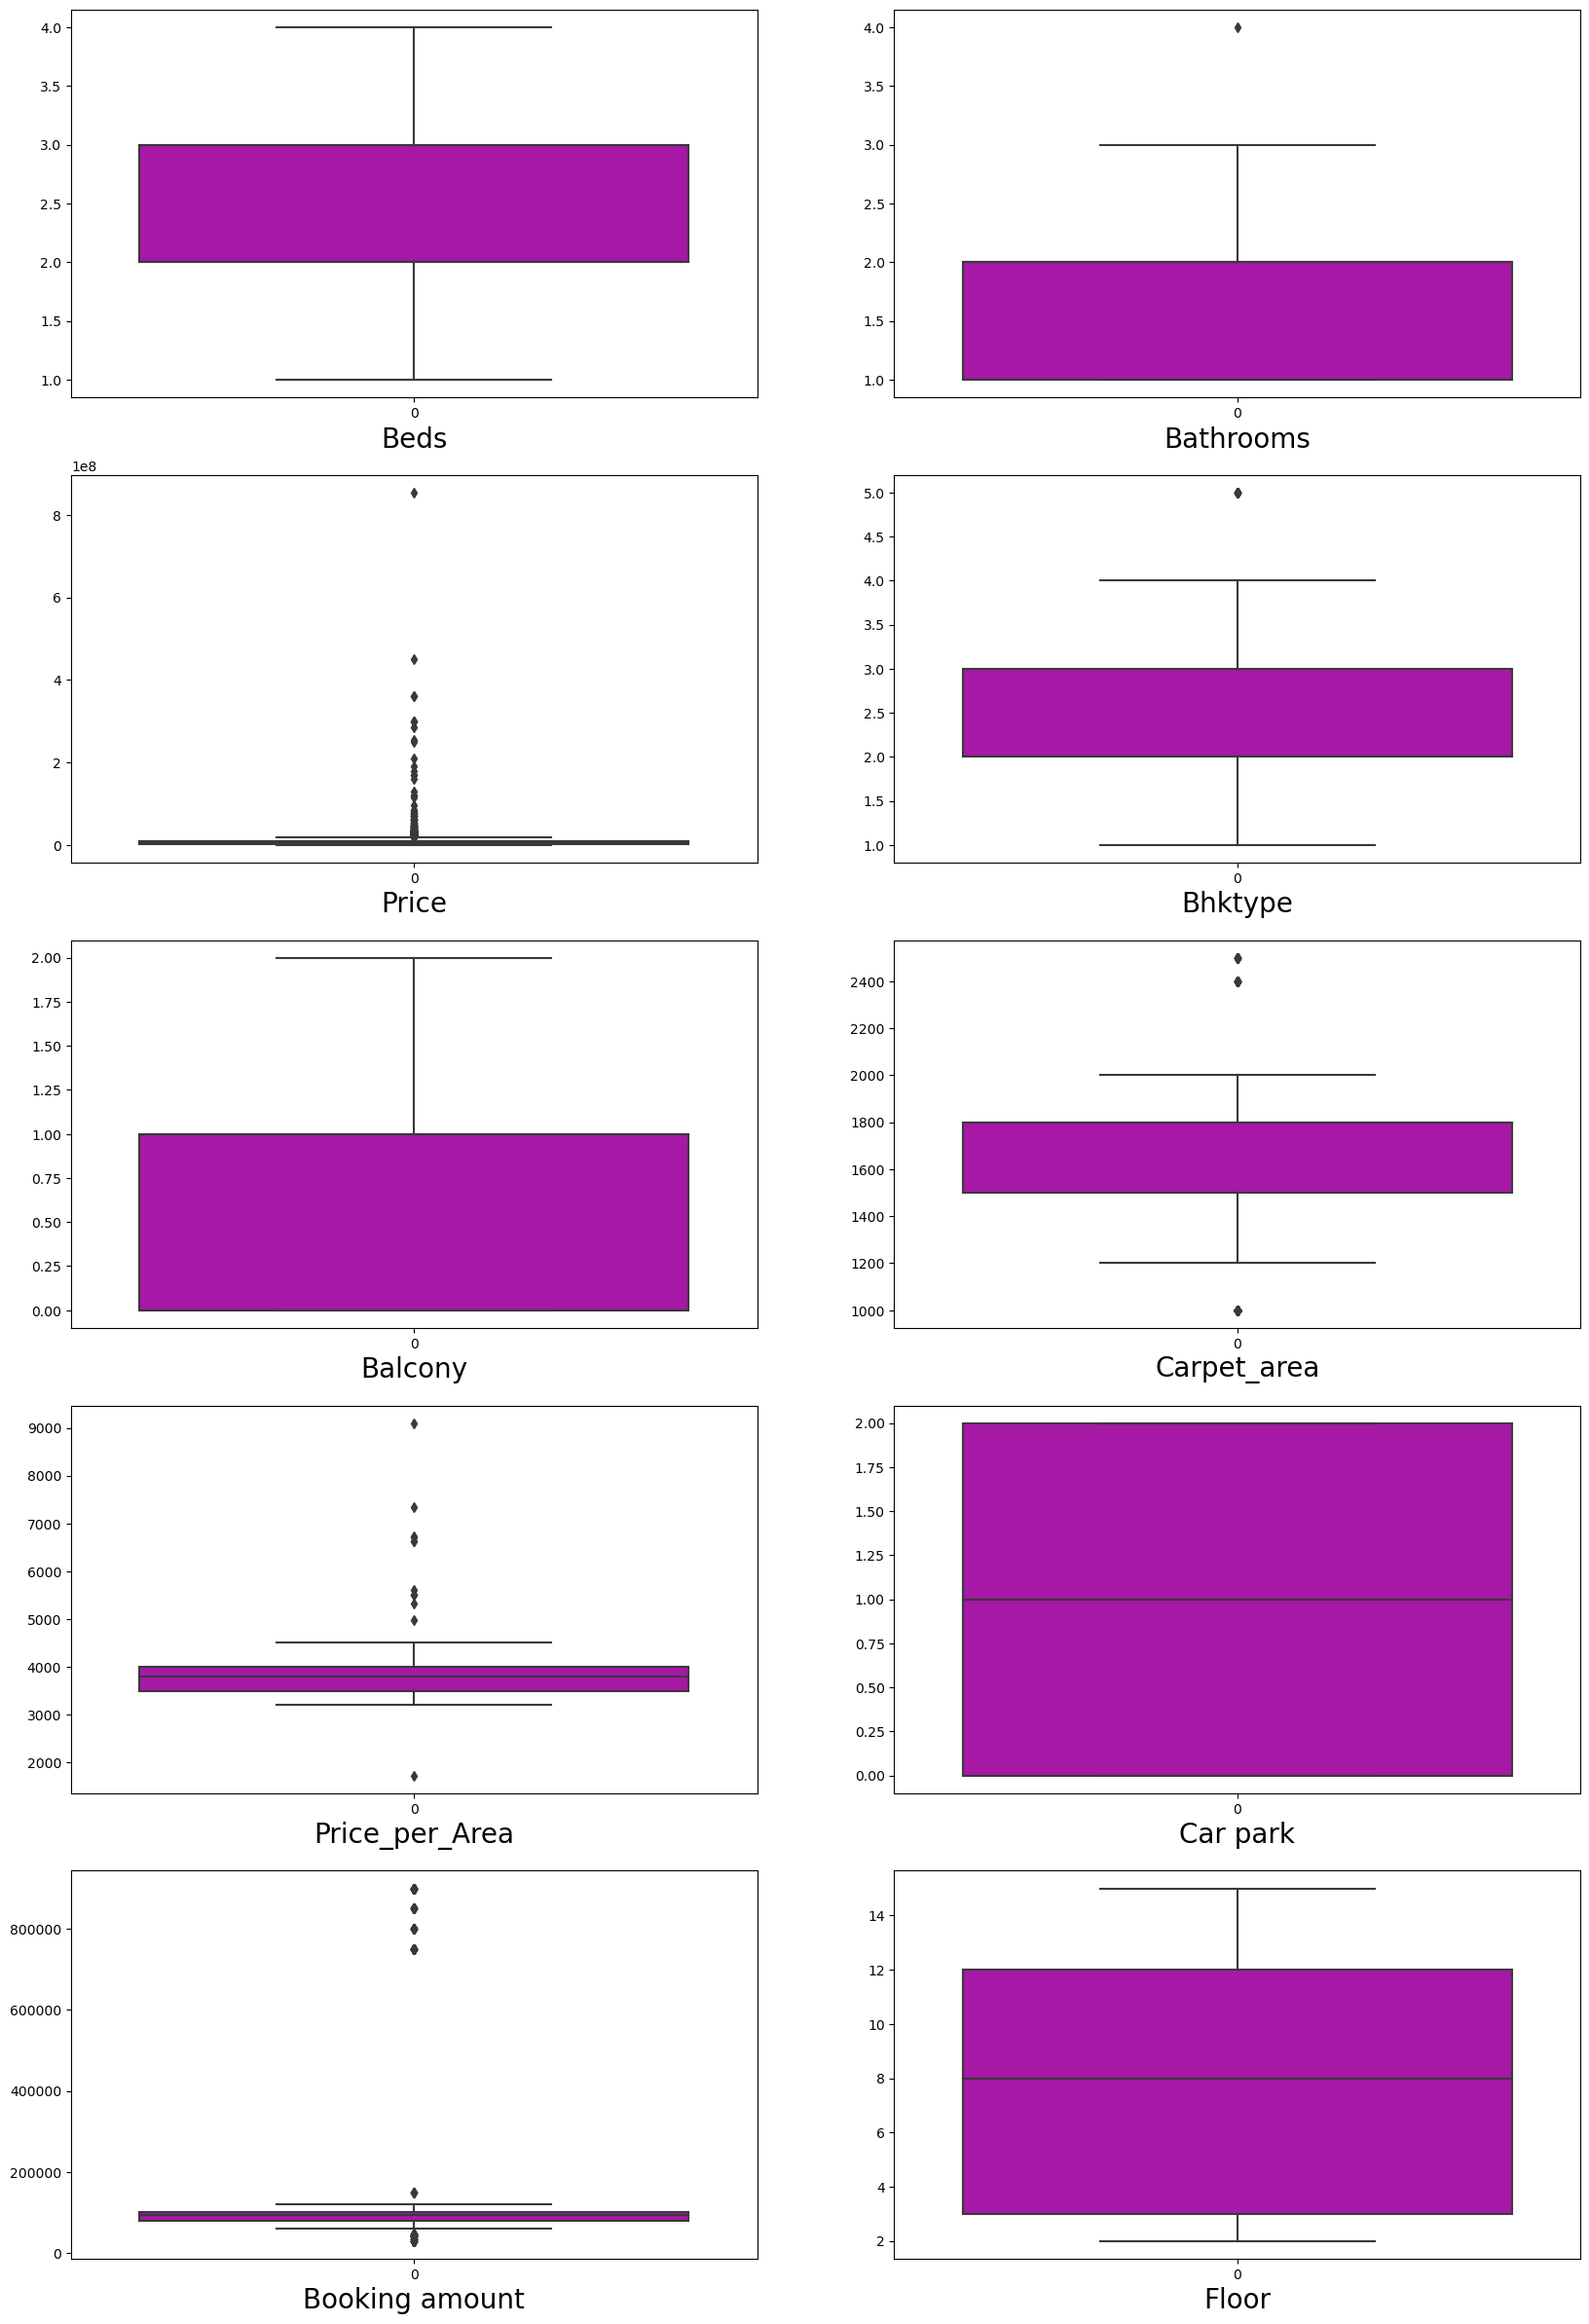

In [91]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in numerical_columns:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(Df[column],color='m')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [92]:
from scipy.stats import zscore
z = np.abs(zscore(Df))
threshold = 3


In [93]:
Df=Df[(z<3).all(axis = 1)]
Df.shape

(2794, 15)

In [94]:
# Lets calculate percentage data loss.
((3027-2794)/3027)*100

7.697390155269243

Since, percentage data loss is nearly 7% which is acceptable, lets proceed further now

## Feature Selection & Engineering

In [95]:
Df.skew()

Beds                  0.533003
Bathrooms             0.245441
Price                 3.450978
Bhktype               0.218850
Property_type         0.564036
Balcony               0.133742
Carpet_area          -0.237060
Construction stats   -0.151053
Price_per_Area        0.315925
Transaction type     -0.866260
Furnished status     -0.221681
Car park              0.049457
Ownership type        0.714906
Booking amount       -0.678172
Floor                 0.143331
dtype: float64

Since our skewness value has all positive, negative and zero values, lets use yeo-johnson power transformation method.

In [96]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['Price', 'Transaction type', 'Booking amount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [97]:
Df[skew] = scaler.fit_transform(Df[skew].values)

In [98]:
Df.skew()

Beds                  0.533003
Bathrooms             0.245441
Price                -0.642030
Bhktype               0.218850
Property_type         0.564036
Balcony               0.133742
Carpet_area          -0.237060
Construction stats   -0.151053
Price_per_Area        0.315925
Transaction type     -0.857124
Furnished status     -0.221681
Car park              0.049457
Ownership type        0.714906
Booking amount        0.015892
Floor                 0.143331
dtype: float64

## Correlation between Independent variable and Target variable

In [99]:
cor=Df.corr()

<Axes: >

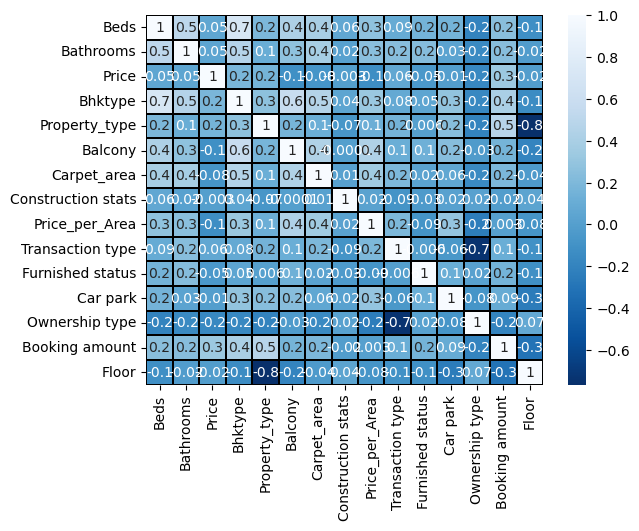

In [100]:
sns.heatmap(Df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

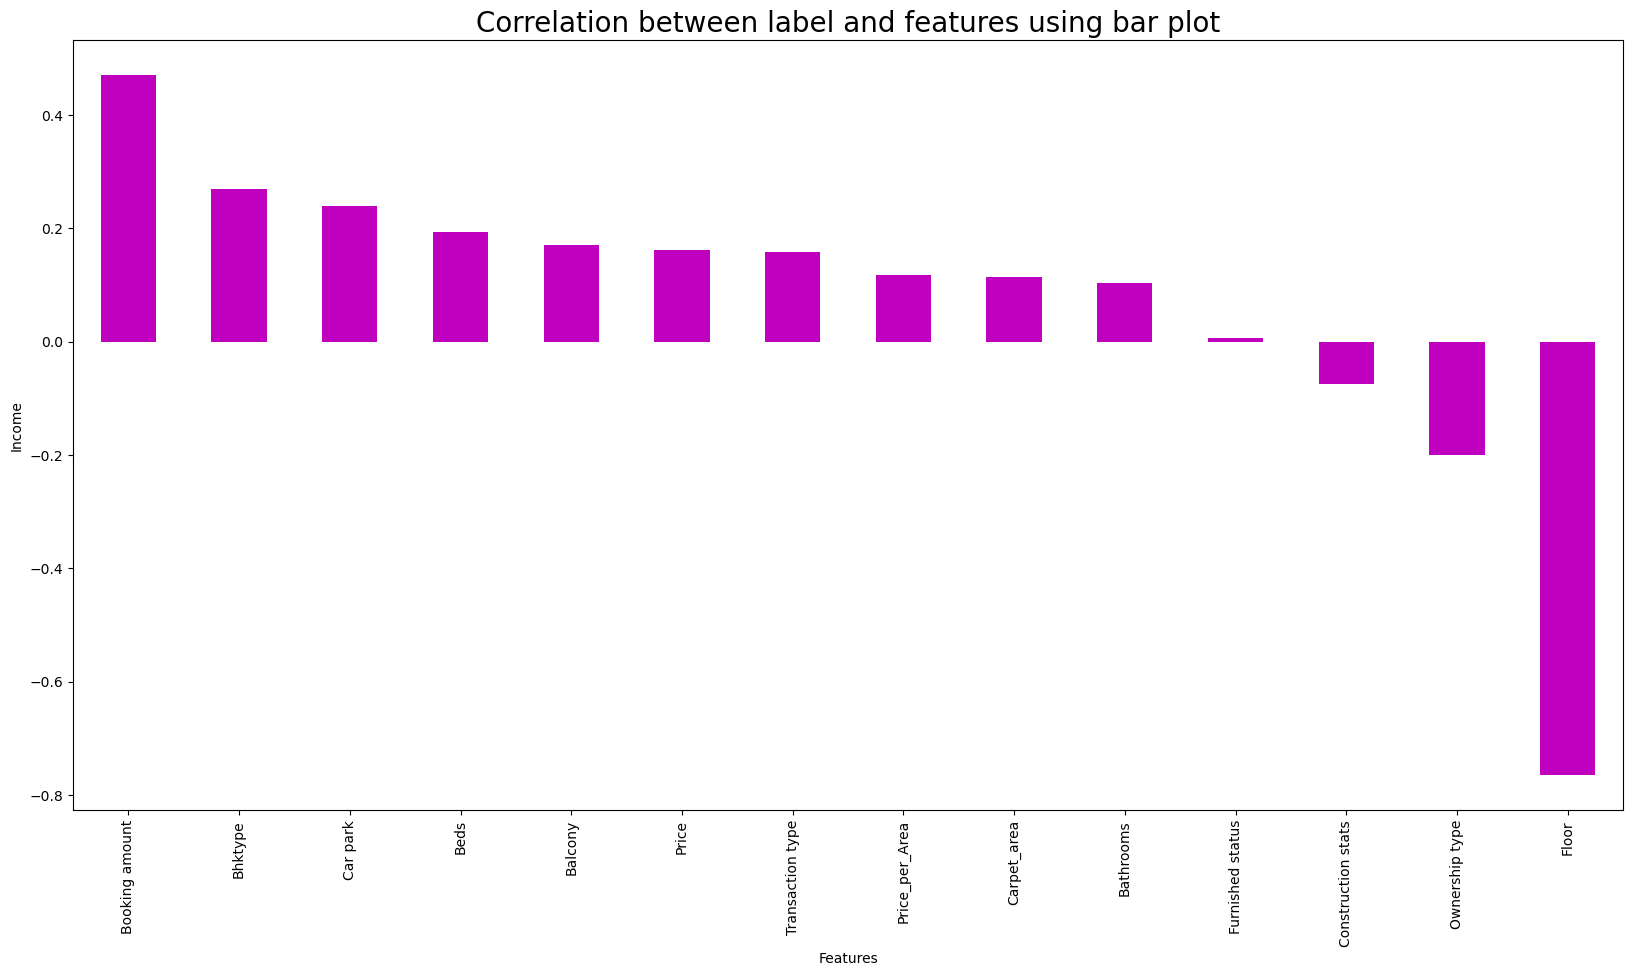

In [101]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize=(20, 10))
Df.corr()['Property_type'].sort_values(ascending = False).drop(['Property_type']).plot(kind = 'bar', color = 'm')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Income', fontsize = 10)
plt.title("Correlation between label and features using bar plot", fontsize = 20)
plt.show()

### Checking Variance Inflation factor

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(Df, i) for i in range(Df.shape[1])]
vif['Features'] = Df.columns
vif

,VIF values,Features
0,20.782180,Beds
1,14.917140,Bathrooms
2,1.267111,Price
3,24.306362,Bhktype
4,3.788714,Property_type
5,4.946595,Balcony
6,23.422457,Carpet_area
7,4.120277,Construction stats
8,2.630574,Transaction type
9,3.895049,Furnished status


In [103]:
Df = Df.drop('Price_per_Area', axis=1)

Lets go for PCA.

## Balancing Target feature

In [105]:
from imblearn.over_sampling import SMOTE

In [107]:
# Splitting data in target and dependent feature
X = Df.drop(['Property_type'], axis =1)
Y = Df['Property_type']

In [108]:
# Oversampleing using SMOTE Technique.
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [109]:
Y.value_counts()

Property_type
1.0    1776
0.0    1776
Name: count, dtype: int64

## Using Standard  Scalarization

In [110]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

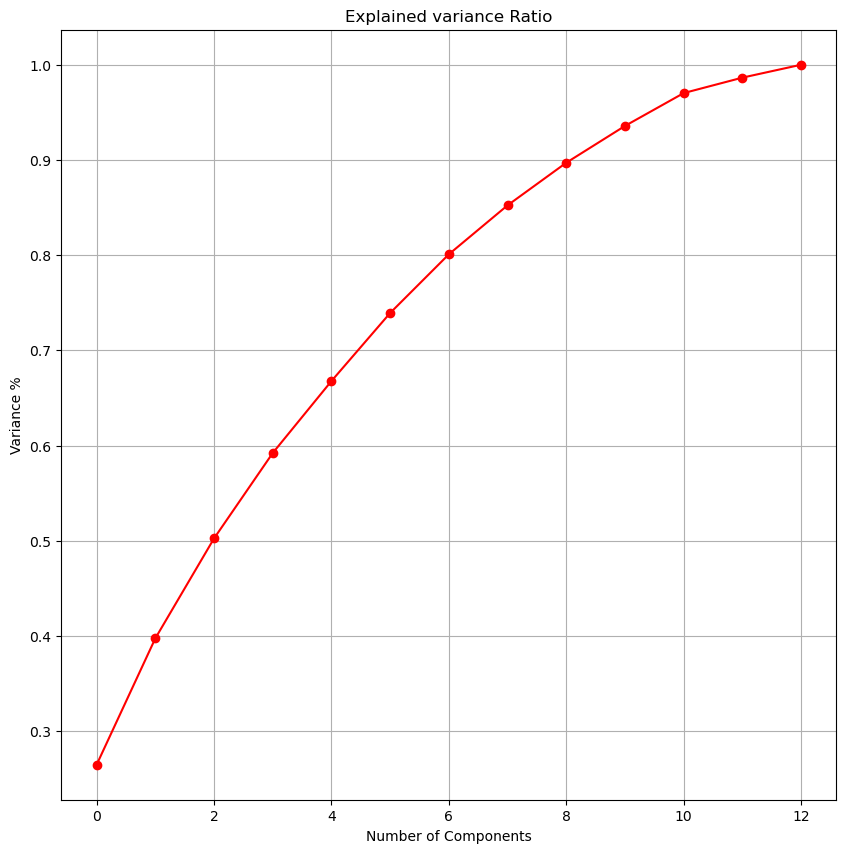

In [111]:
from sklearn.decomposition import PCA
pca = PCA()

#Plotting the graph to find the principal components

x_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

According to our graph, we can see that 10 principal components contribute for 90% of variation in our data. We will thus pick the first 10 components for our analysis.

In [112]:
pca_new = PCA(n_components=10)
x_new = pca_new.fit_transform(X_scaled)

In [113]:
Principle_x=pd.DataFrame(x_new,columns=np.arange(10))

# Model Building

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (2664, 10)
Training target size: (2664,)
Test feature size: (888, 10)
Test target size: (888,)


## Finding Best Random State

In [116]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(Principle_x,Y,test_size = 0.25, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9605855855855856 on Random_state 149


In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=149, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')

accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy: 0.9605855855855856
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       438
         1.0       0.94      0.98      0.96       450

    accuracy                           0.96       888
   macro avg       0.96      0.96      0.96       888
weighted avg       0.96      0.96      0.96       888



In [118]:
model=[ 
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    accuracy = accuracy_score(Y_test, y_pred)
    print('Accuracy:', accuracy)

    print('Classification Report:')
    print(classification_report(Y_test, y_pred))

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       438
         1.0       1.00      1.00      1.00       450

    accuracy                           1.00       888
   macro avg       1.00      1.00      1.00       888
weighted avg       1.00      1.00      1.00       888

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy: 0.9864864864864865
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       438
         1.0       0.99      0.98      0.99       450

    accuracy                           0.99       888
   macro avg       0.99      0.99      0.99       888
weighted avg       0.99      0.99      0.99       888

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy: 0.9988738738738738
Classification Repo

## Cross Validation Score

In [120]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, Principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print('\n')
    print('============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.92123769 0.81293952 0.91126761 0.96619718 0.81126761]
Mean Score : 0.8845819219112141




Cross Validation Score SVC() :

Score : [0.91561181 0.89732771 0.9056338  0.95774648 0.89577465]
Mean Score : 0.9144188902755491




Cross Validation Score DecisionTreeClassifier() :

Score : [0.82559775 0.89873418 0.91549296 0.94084507 0.78309859]
Mean Score : 0.8727537093163764




Cross Validation Score RandomForestClassifier() :

Score : [0.83122363 0.90857947 0.92816901 0.97746479 0.85492958]
Mean Score : 0.9000732949030329




Cross Validation Score ExtraTreesClassifier() :

Score : [0.94092827 0.91279887 0.96056338 1.         0.86619718]
Mean Score : 0.9360975416493336




We will go with Random forest Classifier as among all above it has shown good results.

## Hyperparameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
parameter = { 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [123]:
GSCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [124]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 25}

# For Carpet Area

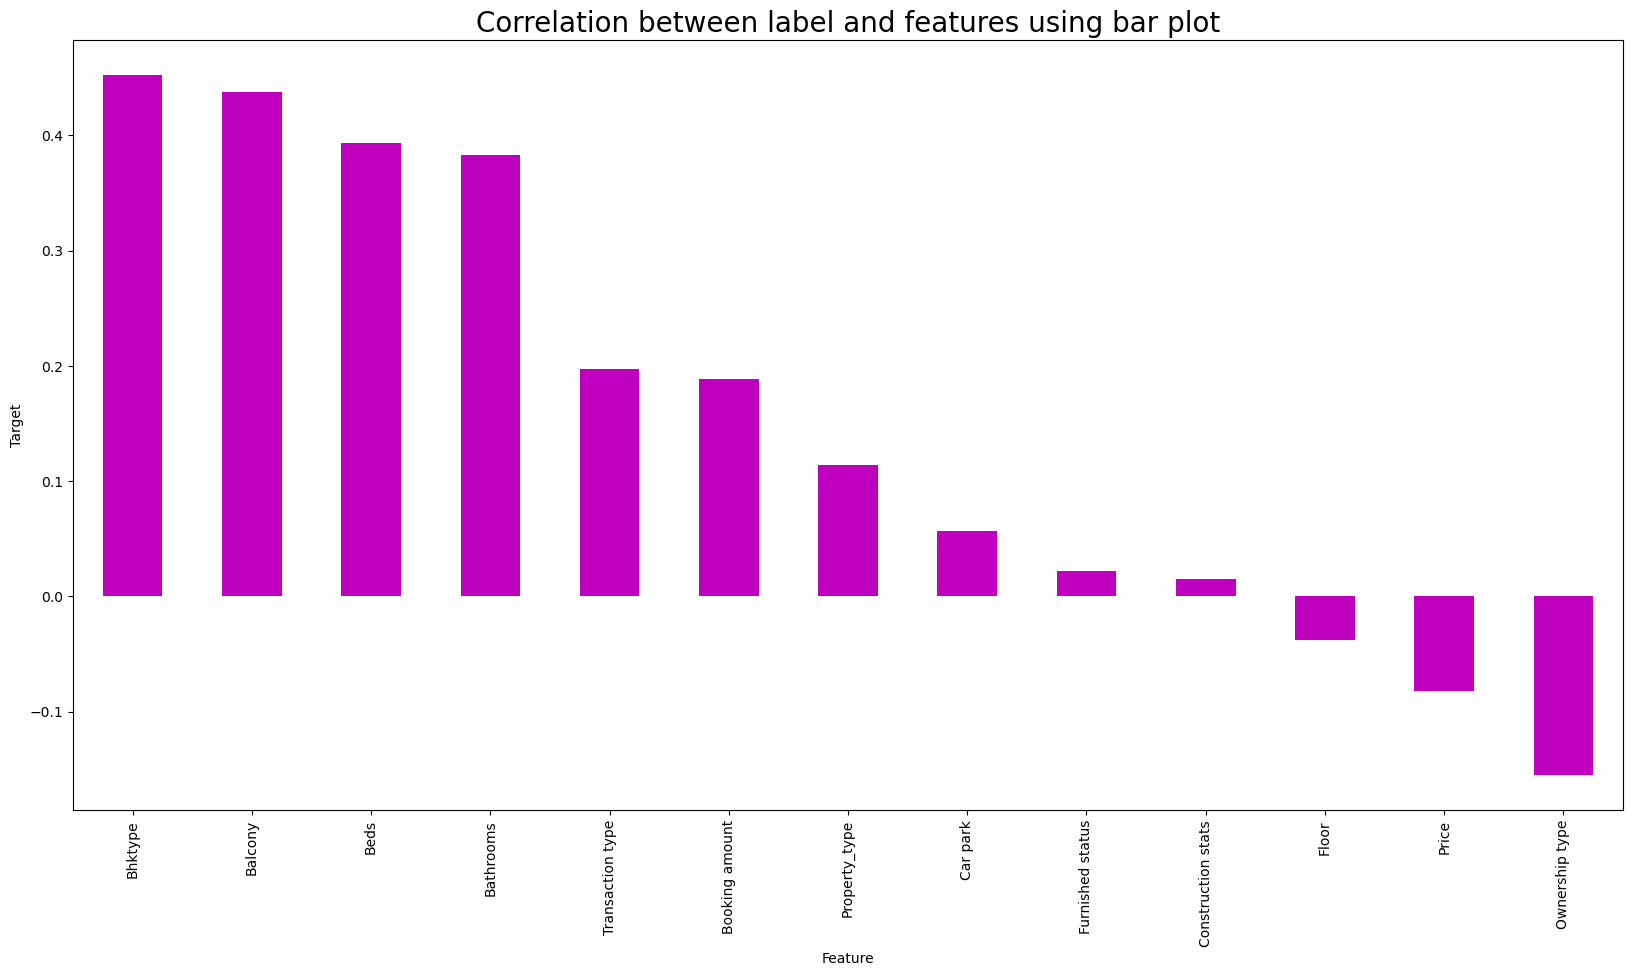

In [127]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize=(20, 10))
Df.corr()['Carpet_area'].sort_values(ascending = False).drop(['Carpet_area']).plot(kind = 'bar', color = 'm')
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Target', fontsize = 10)
plt.title("Correlation between label and features using bar plot", fontsize = 20)
plt.show()

## Feature Scaling using Standard Scalarization

In [128]:
# Splitting data in target and dependent feature
X = Df.drop(['Carpet_area'], axis =1)
Y = Df['Carpet_area']

In [129]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (2095, 13)
Training target size: (2095,)
Test feature size: (699, 13)
Test target size: (699,)


### Finding Best Random State

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [133]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.38746201319157425 on Random_state 176


In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1585.837373   1537.32577361 1209.97176009 1303.23137603 1333.99857625
 1323.19805129 1631.02906898 1841.6652714  1544.157786   1593.21804362
 1640.64152113 1535.07297664 1611.76869232 1878.84318558 1587.2947219
 1801.06262974 1674.07223497 1355.08991303 1465.36618214 1562.35542046
 1630.87411097 1323.83656117 1834.31108646 1472.35054705 1585.58415554
 1623.72283743 1627.12443235 1716.02091438 1938.49226045 1546.33643223
 1899.40652231 1787.51501853 1503.8071572  1575.35408813 1347.07342968
 1485.88076366 1568.60755362 1559.00309684 1487.64874886 1583.41279423
 1467.88698552 2118.91559766 2016.12919341 1742.31471762 1622.49011245
 1438.88621955 1573.72151857 1611.76869232 1320.83491687 1586.31723988
 1439.08555138 1633.24256122 1393.58231447 1489.91432807 1660.46845848
 1355.08991303 1354.46765863 1662.55867127 1469.90508553 1470.84057907
 2025.12528142 1682.6142764  2069.01504458 1506.72820778 1449.353839
 1714.65689744 1403.06014632 1501.43856155 1414.54279206 1477.1

In [135]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))

print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')

print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 218.9234481202491
Mean squared error : 79303.96489169695
Root Mean Squared Error: 281.6095965902031


 R2 Score :
0.36452212462885314


In [137]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)
pred_RFR = RFR.predict(X_test)
pred_train = RFR.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_RFR))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_RFR))
print("Mean squared error: ",mean_squared_error(Y_test, pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_RFR)))

R2_score:  0.9989817973161931
R2_score on training data:  99.95856842612548
Mean Absolute Error:  1.915593705293276
Mean squared error:  127.06580829756795
Root Mean Squared Error:  11.272347062505126


# For Price(Total price)

In [138]:
# Splitting data in target and dependent feature
X = Df.drop(['Price'], axis =1)
Y = Df['Price']

In [139]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (2095, 13)
Training target size: (2095,)
Test feature size: (699, 13)
Test target size: (699,)


In [144]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=i, test_size=.20)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.2769002124465625 on Random_state 103


In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=176, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [-0.41285731  0.57706624 -0.00222837  0.24433134  0.2328743  -0.39028543
  0.27246875 -0.06301519 -1.31864534 -0.68146095  0.59052884  0.07360899
  0.04423918  0.54944805  0.0597999   0.27194954  0.05359138 -0.32509172
  0.57671974 -0.22516138  0.35602724 -1.31864534 -1.30560312 -0.36266723
  0.95830341  0.02981131 -0.68873141  0.23341275  0.808666   -0.57951951
 -0.85651716 -0.27452047 -0.1391035  -0.36266723  0.14380984 -0.25277957
 -0.01928896 -0.27104711  0.06378344  0.56291065  0.57706624  0.29222841
  0.08741809 -0.35602263 -0.64374456 -1.31941222  0.1716969   0.05359138
 -1.07626025  0.12050641  0.36831976  0.56291065  0.95830341 -0.21963433
  0.15407857  0.20574689 -0.16109099 -0.12247502 -0.20980795  0.56291065
 -0.08394019  0.1716969   0.52182986  0.39473813  0.35602724  0.54944805
  0.09140164 -0.031063   -0.26809425  0.56291065 -1.35552575  0.03493269
  0.4248191   0.17150123 -1.31864534  0.56291065 -0.01390662  0.05359138
  0.0597999  -0.58325444 -0.579519